## 경사하강을 이용한 행렬 분해
<h4> 원본 행렬 R 및 R을 분해할 P와 Q를 임의의 정규분포를 가진 랜덤값으로 초기화

In [13]:
import numpy as np

# 원본 행렬 R 생성, 분해 행렬 P와 Q 초기화, 잠재요인 차원 K는 3 설정. 
R = np.array([[4, np.NaN, np.NaN, 2, np.NaN ],
              [np.NaN, 5, np.NaN, 3, 1 ],
              [np.NaN, np.NaN, 3, 4, 4 ],
              [5, 2, 1, 2, np.NaN ]])

num_users, num_items = R.shape
K = 3

# P와 Q 매트릭스의 크기를 지정하고 정규분포(normal함수 호출)를 가진 random한 값으로 입력.
np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users, K))
Q = np.random.normal(scale=1./K, size=(num_items, K))
print("P : ",P) # 4 * 3 행렬
print("Q : ",Q) # 5 * 3 행렬

P :  [[ 0.54144845 -0.2039188  -0.17605725]
 [-0.35765621  0.28846921 -0.76717957]
 [ 0.58160392 -0.25373563  0.10634637]
 [-0.08312346  0.48736931 -0.68671357]]
Q :  [[-0.1074724  -0.12801812  0.37792315]
 [-0.36663042 -0.05747607 -0.29261947]
 [ 0.01407125  0.19427174 -0.36687306]
 [ 0.38157457  0.30053024  0.16749811]
 [ 0.30028532 -0.22790929 -0.04096341]]


<h4> 비용계산 함수를 생성. 분해된 행렬 P와 Q.T를 내적하여 예측 행렬 생성하고 </h4>
<p>실제 행렬에서 Null이 아닌 값의 위치에 있는 값만 예측 행렬의 값과 비교하여 RMSE값을 계산하고 반환

In [14]:
from sklearn.metrics import mean_squared_error

def get_rmse(R,P,Q, non_zeros) :
    error = 0
    # 두개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
    full_pred_matrix = np.dot(P, Q.T)
    
    # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출하여 실제 R 행렬과 예측 행렬의 RMSE 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
    
    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)
    
    return mse

<h4> 경사하강법에 기반하여 P와 Q의 원소들을 업데이트 수행 

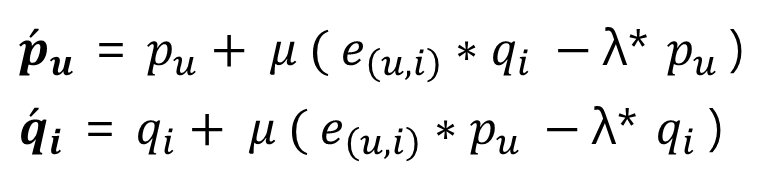

<li>𝒑_𝒖 : P 행렬의 사용자 u행 벡터
<li>〖𝒒_𝒊〗^𝒕 : Q 행렬의 아이템 i행의 transpose vector
<li>𝒓_((𝒖,𝒊) ) : R 행렬의 u행, i열에 위치한 값
<li>𝒓 ́_((𝒖,𝒊)) : 𝑝_𝑢 * 〖𝑞_𝑖〗^𝑡  로 계산하며, u행 i열에 위치한 행렬의 예측 값
<li>𝒆_((𝒖,𝒊) )  : 𝒓_((𝒖,𝒊) ) - 𝒓 ́_((𝒖,𝒊))의 값
   	     u행, i열에 위치한 행렬의 실제 행렬 값과 예측 행렬 값의 차이 오류

<li>𝜶 : 𝑆𝐺𝐷 학습률
<li>"λ" : L2 Regularization 계수

In [16]:
# R > 0 인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장. 
non_zeros = [ (i, j, R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] > 0 ]

steps = 1000
learning_rate = 0.01
r_lambda = 0.01

# SGD 기법으로 P와 Q 매트릭스를 계속 업데이트. 
for step in range(steps):
    for i, j, r in non_zeros:
        # 실제 값과 예측 값의 차이인 오류 값 구함
        eij = r - np.dot(P[i, :], Q[j, :].T)
        # Regularization을 반영한 SGD 업데이트 공식 적용
        P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
        Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])

    rmse = get_rmse(R, P, Q, non_zeros)
    if (step % 50) == 0 :
        print("### iteration step : ", step," rmse : ", rmse)

### iteration step :  0  rmse :  10.489858008094606
### iteration step :  50  rmse :  0.2378242820743239
### iteration step :  100  rmse :  0.02447160839576432
### iteration step :  150  rmse :  0.00555791319815617
### iteration step :  200  rmse :  0.001870758685914871
### iteration step :  250  rmse :  0.0008554647364743957
### iteration step :  300  rmse :  0.0005117148955926273
### iteration step :  350  rmse :  0.0003800018521624745
### iteration step :  400  rmse :  0.0003248184034739339
### iteration step :  450  rmse :  0.00029997152152588856
### iteration step :  500  rmse :  0.00028810506208429634
### iteration step :  550  rmse :  0.00028213264463269617
### iteration step :  600  rmse :  0.0002789341866730179
### iteration step :  650  rmse :  0.0002770472668855623
### iteration step :  700  rmse :  0.00027575624919347905
### iteration step :  750  rmse :  0.0002747041214088538
### iteration step :  800  rmse :  0.0002737143862568513
### iteration step :  850  rmse :  0.0002

In [17]:
pred_matrix = np.dot(P, Q.T)
print("예측 행렬 : \n",np.round(pred_matrix, 3))

예측 행렬 : 
 [[3.991 0.897 1.306 2.002 1.663]
 [6.696 4.978 0.979 2.981 1.003]
 [6.677 0.391 2.987 3.977 3.986]
 [4.968 2.005 1.006 2.017 1.14 ]]


<H4> 실제 값과 비교

In [19]:
R = np.array([[4, np.NaN, np.NaN, 2, np.NaN ],
              [np.NaN, 5, np.NaN, 3, 1 ],
              [np.NaN, np.NaN, 3, 4, 4 ],
              [5, 2, 1, 2, np.NaN ]])
print("실제 행렬 : \n",R)

실제 행렬 : 
 [[ 4. nan nan  2. nan]
 [nan  5. nan  3.  1.]
 [nan nan  3.  4.  4.]
 [ 5.  2.  1.  2. nan]]


## 행렬 분해 기반의 잠재 요인 협업 필터링 실습
<H4> 경사하강법 기반의 행렬 분해 함수 생성

In [21]:
def matrix_factorization(R, K, steps = 200, learning_rate = 0.01, r_lambda = 0.01) :
    num_users, num_items = R.shape
    # P와 Q 매트릭스의 크기를 지정하고 정규분포를 가진 랜덤한 값으로 입력
    np.random.seed(1)
    P = np.random.normal(scale=1./K, size=(num_users, K))
    Q = np.random.normal(scale=1./K, size=(num_items, K))
    
    break_count = 0
    
    # R > 0 인 행 위치, 열 위치, 값을 non_zeros 리스트 객체에 저장. 
    non_zeros = [ (i,j,R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] > 0]
    
    # SGD기법으로 P와 Q 매트릭스를 계속 업데이트. 
    for step in range(steps) :
        for i, j, r in non_zeros :
            # 실제 값과 예측 값의 차이인 오류 값 구함
            eij = r - np.dot(P[i,:],Q[j,:].T)
            # Regularization을 반영한 SGD 업데이트 공식 적용
            P[i,:] = P[i,:] + learning_rate*(eij * Q[j,:] - r_lambda*P[i,:])
            Q[j,:] = Q[j,:] + learning_rate*(eij * P[i,:] - r_lambda*Q[j,:])
            
        rmse = get_rmse(R, P, Q, non_zeros)
        if (step % 10) == 0 :
            print("iteration step : ",step, "rmse : ",rmse)
            
    return P,Q

In [63]:
import pandas as pd
import numpy as np

movies = pd.read_csv("./ml-latest-small/movies.csv")
ratings = pd.read_csv("./ml-latest-small/ratings.csv")
ratings = ratings[['userId','movieId','rating']]
ratings_matrix = ratings.pivot_table('rating', index='userId', columns = 'movieId')

# title 컬럼을 얻기 이해 movies 와 조인 수행
rating_movies = pd.merge(ratings, movies , on='movieId')

# columns='title' 로 title 컬럼으로 pivot 수행. 
ratings_matrix = rating_movies.pivot_table("rating", index='userId', columns='title')

In [64]:
ratings_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
P,Q = matrix_factorization(ratings_matrix.values, K = 50, steps = 200, learning_rate = 0.01, r_lambda = 0.01)

iteration step :  0 rmse :  8.423705034701914
iteration step :  10 rmse :  0.5381350082096514
iteration step :  20 rmse :  0.2616873953526066
iteration step :  30 rmse :  0.13884289422659946
iteration step :  40 rmse :  0.0876644500076515
iteration step :  50 rmse :  0.06352180214146708
iteration step :  60 rmse :  0.05056878035552724
iteration step :  70 rmse :  0.04278880610647559
iteration step :  80 rmse :  0.03768808288452509
iteration step :  90 rmse :  0.03411439291872161
iteration step :  100 rmse :  0.031481147723579454
iteration step :  110 rmse :  0.02946450167499211
iteration step :  120 rmse :  0.027872910023915145
iteration step :  130 rmse :  0.026586255346641597
iteration step :  140 rmse :  0.02552546850158906
iteration step :  150 rmse :  0.02463640078871332
iteration step :  160 rmse :  0.02388075155171797
iteration step :  170 rmse :  0.02323069360565542
iteration step :  180 rmse :  0.022665545607672727
iteration step :  190 rmse :  0.022169634407598445


In [75]:
pred_matrix = np.dot(P, Q.T)
ratings_pred_matrix = pd.DataFrame(data=pred_matrix, index= ratings_matrix.index,
                                   columns = ratings_matrix.columns)

ratings_pred_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,3.055084,4.092018,3.564130,4.502167,3.981215,1.271694,3.603274,2.333266,5.091749,3.972454,...,1.402608,4.208382,3.705957,2.720514,2.787331,3.475076,3.253458,2.161087,4.010495,0.859474
2,3.170119,3.657992,3.308707,4.166521,4.311890,1.275469,4.237972,1.900366,3.392859,3.647421,...,0.973811,3.528264,3.361532,2.672535,2.404456,4.232789,2.911602,1.634576,4.135735,0.725684
3,2.307073,1.658853,1.443538,2.208859,2.229486,0.780760,1.997043,0.924908,2.970700,2.551446,...,0.520354,1.709494,2.281596,1.782833,1.635173,1.323276,2.887580,1.042618,2.293890,0.396941


In [81]:
ratings_matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [76]:
def get_unseen_movies(ratings_matrix, userId):
    # userId로 입력받은 사용자의 모든 영화정보 추출하여 Series로 반환함. 
    # 반환된 user_rating 은 영화명(title)을 index로 가지는 Series 객체임. 
    user_rating = ratings_matrix.loc[userId,:]
    
    # user_rating이 0보다 크면 기존에 관람한 영화임. 대상 index를 추출하여 list 객체로 만듬
    already_seen = user_rating[ user_rating > 0].index.tolist()
    
    # 모든 영화명을 list 객체로 만듬. 
    movies_list = ratings_matrix.columns.tolist()
    
    # list comprehension으로 already_seen에 해당하는 movie는 movies_list에서 제외함. 
    unseen_list = [ movie for movie in movies_list if movie not in already_seen]
    
    return unseen_list

In [77]:
def recomm_movie_by_userid(pred_df, userId, unseen_list, top_n=10):
    # 예측 평점 DataFrame에서 사용자id index와 unseen_list로 들어온 영화명 컬럼을 추출하여
    # 가장 예측 평점이 높은 순으로 정렬함. 
    recomm_movies = pred_df.loc[userId, unseen_list].sort_values(ascending = False)[:top_n]
    return recomm_movies

In [79]:
# 사용자가 관람하지 않는 영화명 추출   
unseen_list = get_unseen_movies(ratings_matrix, 9)

# 잠재요인 기반 협업 필터링으로 영화 추천 
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 9, unseen_list, top_n=10)

# 평점 데이타를 DataFrame으로 생성. 
recomm_movies = pd.DataFrame(data=recomm_movies.values,index=recomm_movies.index,columns=['pred_score'])
recomm_movies

,pred_score
title,
Rear Window (1954),5.704612
"South Park: Bigger, Longer and Uncut (1999)",5.451100
Rounders (1998),5.298393
Blade Runner (1982),5.244951
Roger & Me (1989),5.191962
Gattaca (1997),5.183179
Ben-Hur (1959),5.130463
Rosencrantz and Guildenstern Are Dead (1990),5.087375
"Big Lebowski, The (1998)",5.038690
